# (1) Heat integration

## Quick run

**Problem 1**: Sizing an solid oxide cell electrolysis system and auxiliary systems to produce 1000 kg/h of hydrogen with minimal energy losses 

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-03, 4e+03]
  Cost   [1e+00, 4e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+03]
Presolving model
15 rows, 12 cols, 30 nonzeros  0s
3 rows, 6 cols, 7 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Solving report
  Status            Optimal
  Primal bound      -2191.71695073
  Dual bound        -2191.71695073
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    -2191.71695073 (objective)
                    0 (bound viol.)
                    0 (int. viol.)
                    0 (row viol.)
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.)
                    0 (separation)
                    0 (heuristics)
* Solver : HiGHS

* Status
  Result count       : 1
  Termina

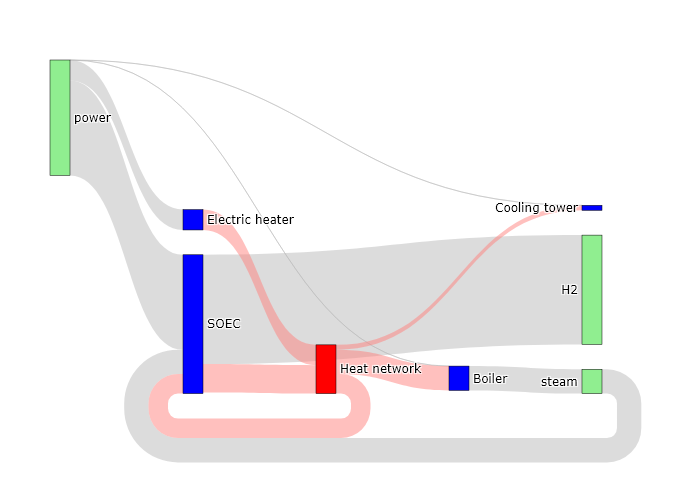

In [1]:
include("../../src/vivi.jl")
using HiGHS

# Resource types
hhv_h2 = 141.80E3/3600 # kWh/kg
e_steam = (2249+326.1)/3600 # kWh/kg
steam = ResourceType(n="steam",u="kg/h",c=[e_steam;;])
power = ResourceType(n="power",u="kW",c=[1;;])
h2 = ResourceType(n="H2",u="kg/h",c=[hhv_h2;;])
water = ResourceType(n="water",u="kg/h",c=[0;;])
o2 = ResourceType(n="O2",u="kg/h",c=[0;;])

# Solid oxide electrolysis system
se_in = [
    Resource(t=steam,r=[318.35]),
    Resource(t=power,r=[888.61+1.26])
    ]
se_out = [
    Resource(t=h2,r=[26.00]),
    Resource(t=water,r=[71.799]),
    Resource(t=o2,r=[206.38])
]
se_heat = [
    Heat(q=120.61,Ts=375.9,Tt=1023.2),
    Heat(q=95.46,Ts=1023.2,Tt=473.2),
    Heat(q=9.03,Ts=480.6,Tt=313.2),
    Heat(q=61.98,Ts=480.6,Tt=1023.2),
    Heat(q=105.61,Ts=1023.2,Tt=343.5),
    Heat(q=55.68,Ts=343.5,Tt=313.2),
]
soec = Tech(n="SOEC",i=se_in,o=se_out,h=se_heat)

# Steam boiler
boiler_in = [
    Resource(t=power,r=[0.017]),
    Resource(t=water,r=[3600])
    ]
boiler_out = [Resource(t=steam,r=[3600])]      
boiler_heat = [
    Heat(q=326.1,Ts=298,Tt=376),
    Heat(q=2249,Ts=376,Tt=377)
    ]
boiler = Tech(n="Boiler",i=boiler_in,o=boiler_out,h=boiler_heat)

# Eletric heating
eh_in = [Resource(t=power,r=[1000])]
eh_heat = [Heat(q=1000,Ts=1273,Tt=1272)]
eh = Tech(n="Electric heater",i=eh_in,h=eh_heat)

# Cooling tower
ct_in = [Resource(t=power,r=[14.3])]
ct_heat = [Heat(q=1000,Ts=298,Tt=318)]
ct = Tech(n="Cooling tower",i=ct_in,h=ct_heat)

# Inputs
power = Resource(t=power,r=[Inf])
water = Resource(t=water,r=[Inf])
inputs = [power,water]

# Outputs
h2 = Resource(t=h2,r=[1000])
o2 = Resource(t=o2,r=[Inf])
outputs = [h2,o2]

# Problem solving
problem = Problem(i=inputs,p=[soec,boiler],ut=[eh,ct],o=outputs)
answer = vivi(problem,HiGHS.Optimizer)
vivi_sankey(answer,valueIndex=1)

# Explanation

Importing the vivi functions and the optimization solver 

In [2]:
include("../../src/vivi.jl")
using HiGHS

### Creating resource types

    ResourceType(
        n::String = Name of the resource
        u::String = Unit of the resource
        c::Matrix{Real} = A cost matrix for converting the resource type unit at each time step 
        )

In [3]:
hhv_h2 = 141.80E3/3600 # kWh/kg
e_steam = (2249+326.1)/3600 # kWh/kg
steam = ResourceType(n="steam",u="kg/h",c=[e_steam;;])
power = ResourceType(n="power",u="kW",c=[1;;])
h2 = ResourceType(n="H2",u="kg/h",c=[hhv_h2;;])
water = ResourceType(n="water",u="kg/h",c=[0;;])
o2 = ResourceType(n="O2",u="kg/h",c=[0;;])

ResourceType("O2", Real[0;;], "kg/h")

### Creating techs

    Resource(
        t::ResourceType = The resource type
        r::Vector{Real} = The transfer rate of the resource
    )
    
    Heat(
        q::Real = Heat transfer rate [kW]
        Ts::Real = Source temperature of heat [K]
        Tt::Real = Target temperature of heat [K]
    )

    Tech(
        n::String = Name of the tech
        u::String = Unit of the resource
        c::Matrix{Real} = A cost matrix for converting the resource type unit at each time step 
    )

A **solid oxide electrolysis system**

![SOEC system image](./img/soec.svg)

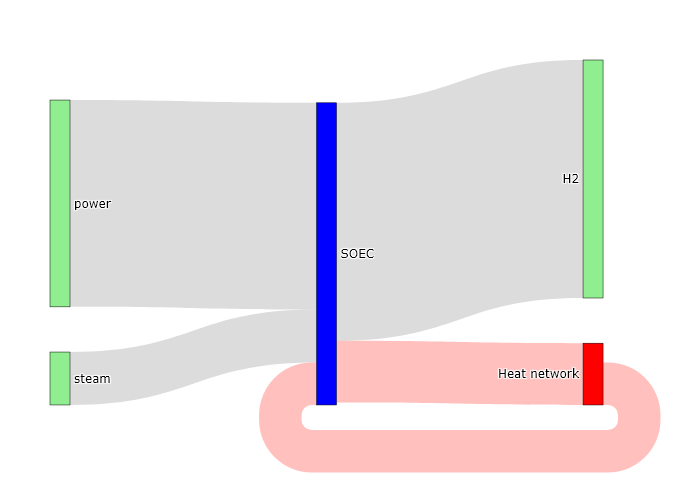

In [4]:
se_in = [
    Resource(t=steam,r=[318.35]),
    Resource(t=power,r=[888.61+1.26])
    ]
se_out = [
    Resource(t=h2,r=[26.00]),
    Resource(t=water,r=[71.799]),
    Resource(t=o2,r=[206.38])
]
se_heat = [
    Heat(q=120.61,Ts=375.9,Tt=1023.2),
    Heat(q=95.46,Ts=1023.2,Tt=473.2),
    Heat(q=9.03,Ts=480.6,Tt=313.2),
    Heat(q=61.98,Ts=480.6,Tt=1023.2),
    Heat(q=105.61,Ts=1023.2,Tt=343.5),
    Heat(q=55.68,Ts=343.5,Tt=313.2),
]
soec = Tech(n="SOEC",i=se_in,o=se_out,h=se_heat)
vivi_sankey(soec,valueIndex=1) # printing the energy balance in HHV basis

A **steam boiler**

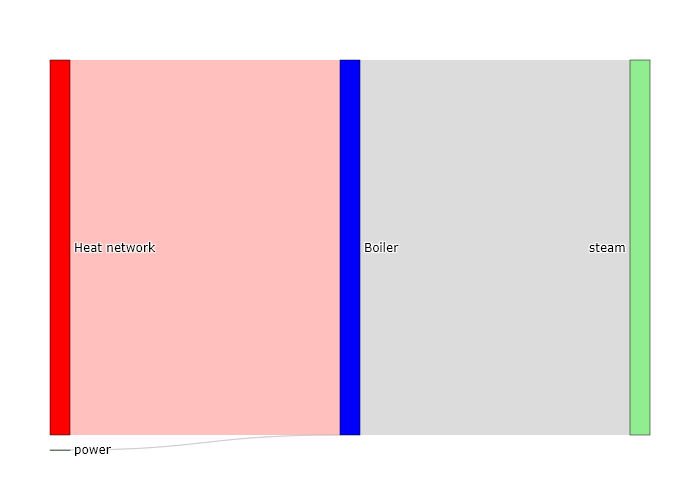

In [5]:
boiler_in = [
    Resource(t=power,r=[0.017]),
    Resource(t=water,r=[3600])
    ]
boiler_out = [Resource(t=steam,r=[3600])]
                
boiler_heat = [
    Heat(q=326.1,Ts=298,Tt=376),
    Heat(q=2249,Ts=376,Tt=377)
    ]

boiler = Tech(n="Boiler",i=boiler_in,o=boiler_out,h=boiler_heat)
vivi_sankey(boiler,valueIndex=1) # printing the energy balance in HHV basis

Auxiliary **electric heating** (ideal heat source)

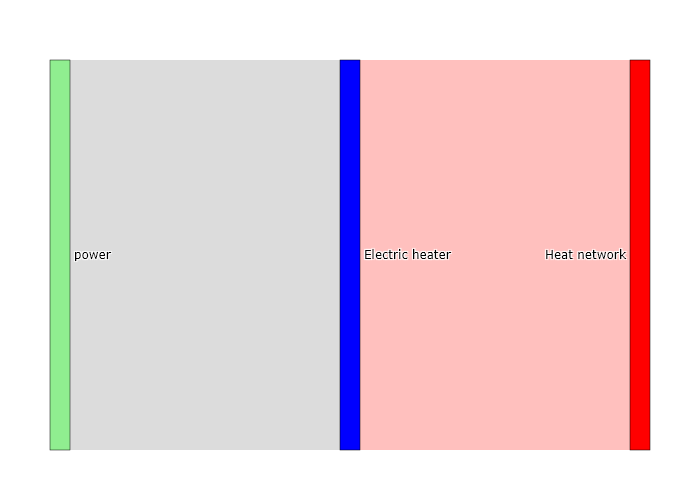

In [6]:
eh_in = [Resource(t=power,r=[1000])]
eh_heat = [Heat(q=1000,Ts=1273,Tt=1272)]
eh = Tech(n="Electric heater",i=eh_in,h=eh_heat)
vivi_sankey(eh,valueIndex=1) # printing the energy balance in HHV basis

A **cooling tower** (ideal heat sink)

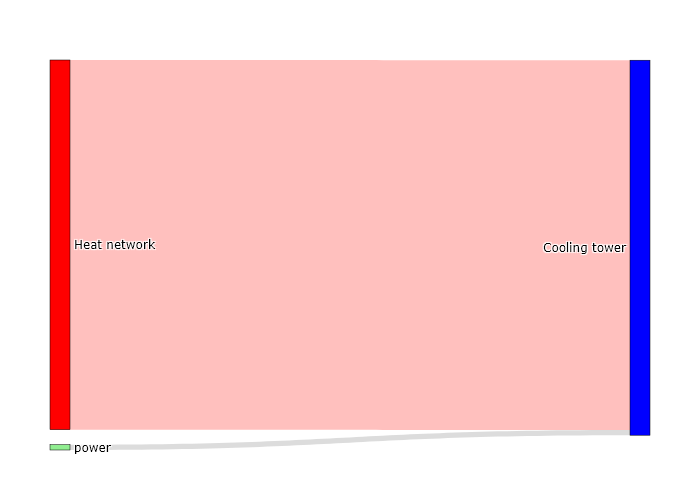

In [7]:
ct_in = [Resource(t=power,r=[14.3])]
ct_heat = [Heat(q=1000,Ts=298,Tt=318)]
ct = Tech(n="Cooling tower",i=ct_in,h=ct_heat)
vivi_sankey(ct,valueIndex=1)

## Problem statement

The input boundaries:
* Unlimited availability of **power**
* Unlimited availability of **water**

In [8]:
power = Resource(t=power,r=[Inf])
water = Resource(t=water,r=[Inf])

inputs = [power,water]

2-element Vector{Resource}:
 Resource(ResourceType("power", Real[1;;], "kW"), Real[Inf], Real[0 0; 1 1])
 Resource(ResourceType("water", Real[0;;], "kg/h"), Real[Inf], Real[0 0; 1 1])

The output boundaries:
* Production of 1000 kg/h of **hydrogen**
* Unlimited sink of **oxygen**

In [9]:
h2 = Resource(t=h2,r=[1000])
o2 = Resource(t=o2,r=[Inf])

outputs = [h2,o2]

2-element Vector{Resource}:
 Resource(ResourceType("H2", Real[39.388888888888886;;], "kg/h"), Real[1000], Real[0 0; 1 1])
 Resource(ResourceType("O2", Real[0;;], "kg/h"), Real[Inf], Real[0 0; 1 1])

Joining inputs, outputs and processes:

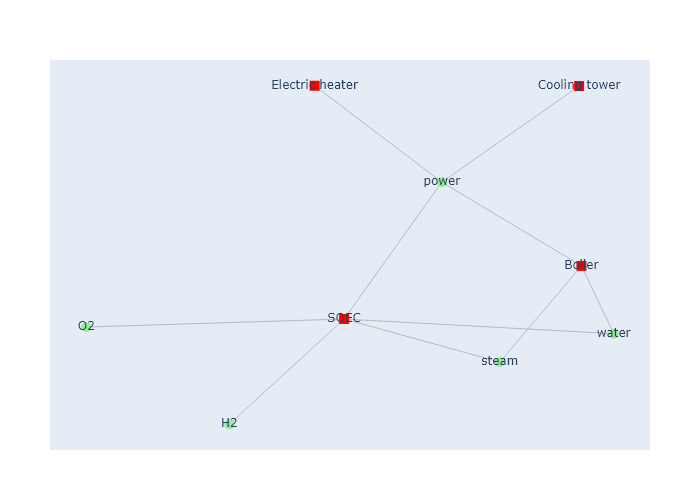

In [10]:
problem = Problem(i=inputs,p=[soec,boiler],ut=[eh,ct],o=outputs)
vivi_graph(problem) # Ploting a graph view of the Techs (red) and Resources (green)

## Solving

The problem can be solved by calling the vivi function

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-03, 4e+03]
  Cost   [1e+00, 4e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+03]
Presolving model
15 rows, 12 cols, 30 nonzeros  0s
3 rows, 6 cols, 7 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Solving report
  Status            Optimal
  Primal bound      -2191.71695073
  Dual bound        -2191.71695073
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    -2191.71695073 (objective)
                    0 (bound viol.)
                    0 (int. viol.)
                    0 (row viol.)
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.)
                    0 (separation)
                    0 (heuristics)
* Solver : HiGHS

* Status
  Result count       : 1
  Termina

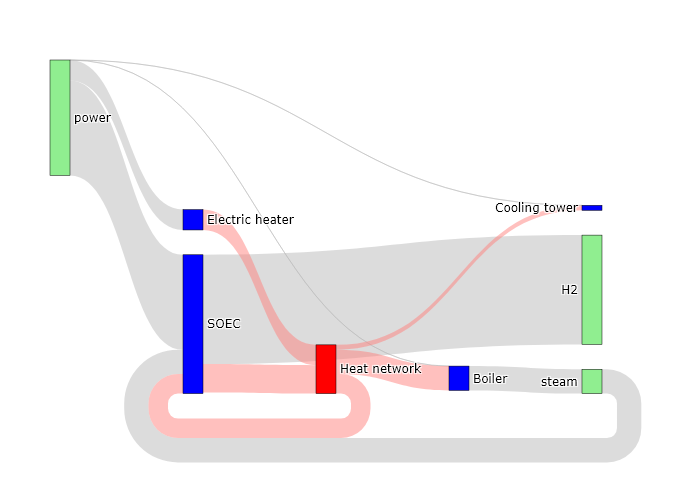

In [11]:
answer = vivi(problem,HiGHS.Optimizer)
vivi_sankey(answer,valueIndex=1) # Ploting a Sankey diagram of the energy balance (HHV basis)

**Understanding the answer**

The optimization problem calculates the sizing factors for each of the technologies to achieve the desired constraints in the problem that minimizes the objective function:

 $$ \min_{\gamma_t} \sum_o c_o r_o - \sum_i c_i r_i $$

 In which,
 * $\gamma_t$: size factor of technology
 * $c_o$ and $c_i$: specific cost of output "o" and input "i", respectively
 * $r_o$ and $r_i$: rate of output "o" and input "i", respectively

**But, what is being optimized?**

In this case, heat integration is being optimized to minize the extra power required to supply heat for the system. Traditionally this is can be done by trial and error or heuristics, but here this design phase is automated by the optimization problem. This can be observed by viewing the composite curves of the answer:

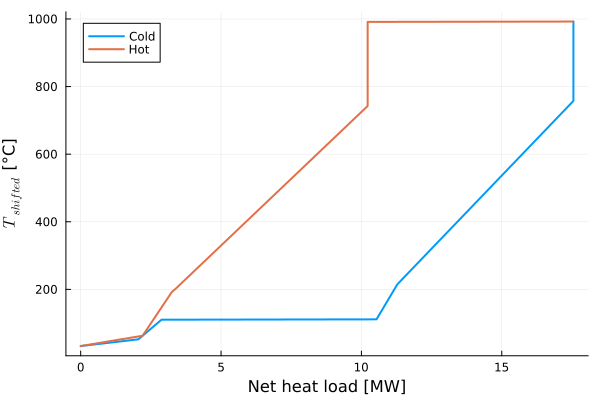

In [12]:
# Composite curves of the heat exchanger network
vivi_cc(answer,HiGHS.Optimizer)

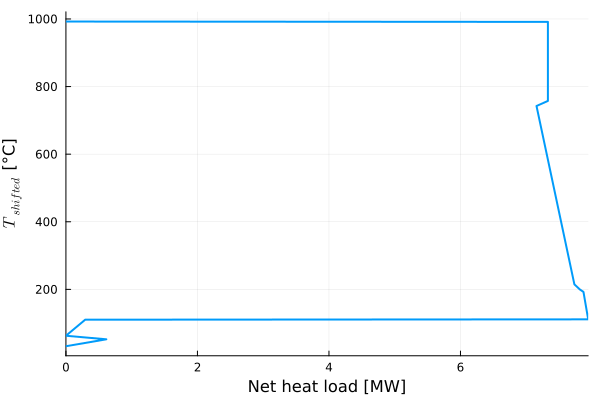

In [13]:
# Grand composite curve
vivi_gcc(answer,HiGHS.Optimizer)

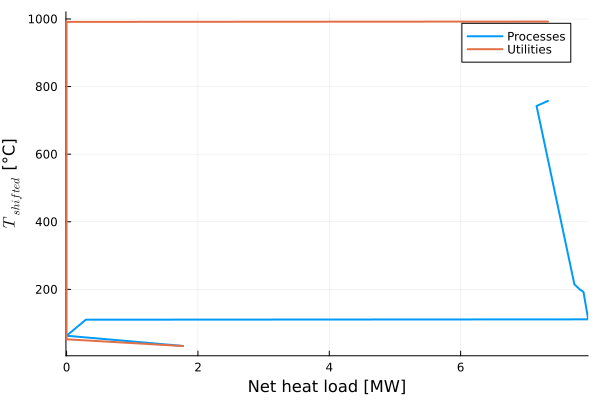

In [14]:
# Integrated composite curve
vivi_icc(answer,HiGHS.Optimizer)

From the energy balance it can observed that the energy efficiency of the system is quite high:

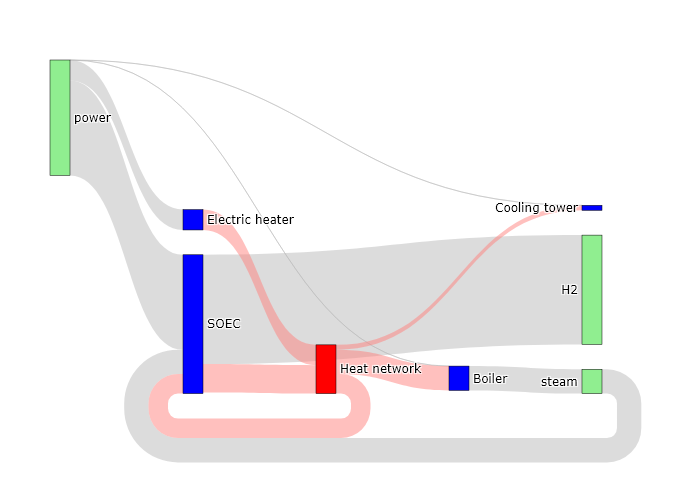

In [15]:
vivi_sankey(answer,valueIndex=1) # Ploting a Sankey diagram of the energy balance (HHV basis)

In [16]:
η=39.4/41.6*100
println("Energy efficiency (HHV) is $η %")

Energy efficiency (HHV) is 94.71153846153845 %


It's also noticible that the electric heating is a significant energy consumption in the system:

In [17]:
eh_p100 = 7.33/41.6*100
println("Electric heating represents $eh_p100 % of power consumption")

Electric heating represents 17.620192307692307 % of power consumption


Therefore, integrating SOEC with other exothermal process may **reduce up to 17.6% power consumption**